In [2]:
pip install pandas scikit-learn scikit-learn-extra matplotlib


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 53.1 MB/s eta 0:00:00


In [3]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn_extra.cluster import KMedoids
import matplotlib.pyplot as plt


In [5]:
# Load and prepare data
data = pd.read_csv('CC_GENERAL.csv')
data = data.select_dtypes(include=[float, int])  # Remove non-numeric columns
data = data.fillna(data.mean())  # Fill missing values


In [6]:
# Standardize features
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)


In [7]:
# Determine the optimal number of clusters using the Silhouette Method
silhouette_scores = []
k_range = range(2, 10)

for k in k_range:
    kmedoids = KMedoids(n_clusters=k, random_state=0)
    labels = kmedoids.fit_predict(data_scaled)
    silhouette_avg = silhouette_score(data_scaled, labels)
    silhouette_scores.append(silhouette_avg)


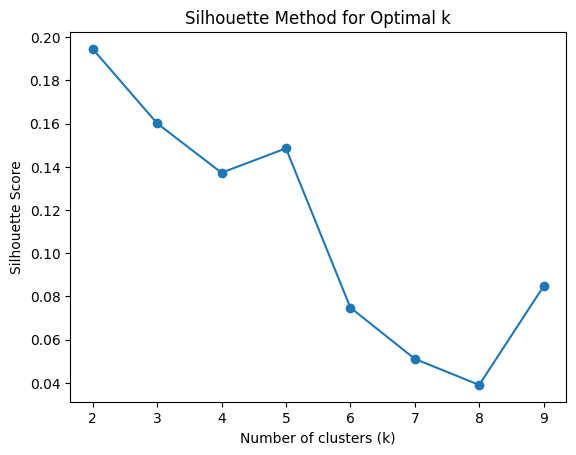

In [8]:
# Plot Silhouette scores
plt.plot(k_range, silhouette_scores, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Method for Optimal k')
plt.show()


In [9]:
# Choose optimal k (highest silhouette score) and fit final model
optimal_k = k_range[silhouette_scores.index(max(silhouette_scores))]
kmedoids = KMedoids(n_clusters=optimal_k, random_state=0)
kmedoids.fit(data_scaled)


KMedoids(n_clusters=2, random_state=0)

In [10]:
# Get final cluster assignments
data['Cluster'] = kmedoids.labels_
